# set up

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# import dataset

## read data from excel

In [2]:
import pandas as pd
data = pd.read_excel(r'C:\Users\ASUS\Desktop\machine learning\MLfinalReport\AHIdata.xlsx')

## extract y from excel

In [3]:
df = pd.DataFrame(data, columns=['rescored AHI'])
print(type(df))#datatype is pd.dataframe not numpy array
df_2D = df.to_numpy()#convert into numpy array
#print(df_2D)#now it is numpy 2d array

<class 'pandas.core.frame.DataFrame'>


In [4]:
y_stack = df_2D.flatten()#flatten into 1d array
print(y_stack)

[ 15.2  12.   27.8  71.2  34.3  86.9  17.5  78.3  40.5  21.2  94.7  40.2
  41.1  11.5  61.4 108.8  59.6  24.1   9.5  33.2  11.9  76.7  29.7  23.7
  38.   79.9  13.8  61.9   8.8   8.5  37.1  38.7  33.9  46.4  34.5  25.8
  82.3  13.4  85.4  42.9  24.3  37.8  16.9  47.6  50.   21.1   1.6   2.1
  12.3  66.3  27.9  17.    2.   11.   53.   20.8  50.9  15.6  66.2  56.1
  49.8  10.2  77.7   7.2   3.   47.3  78.9  15.6   9.   47.2  12.    7.6
  42.3  26.3   7.5  31.5   1.9  15.8  11.6   8.5  20.5  52.4  20.2  16.6
  19.8  37.9  60.2  36.1  24.5  24.6  22.4  30.   16.9   7.7   8.8   7.1
  39.1   4.6   1.8  97.3  60.5   6.9  28.3  41.   75.   13.7  89.2  76.5
  85.   77.   51.2   3.3  78.1   7.9  26.9  80.5  30.9  66.9   2.3]


## encoding y_stack

In [5]:
for count in range (0, 119):
    if y_stack[count]>=30:     #AHI>=30, class:3
        y_stack[count]=3
    elif y_stack[count]>=15:  #30>AHI>=15, class:2
        y_stack[count]=2
    elif y_stack[count]>=5:    #15>AHI>=5, class:1
        y_stack[count]=1
    else:
        y_stack[count]=0       #5>AHI, class:0 

In [ ]:
for count in range (0, 119):
    if y_stack[count]>=5:
        y_stack[count]=1
    else:
        y_stack[count]=0

## extract inputs from excel

In [6]:
#BMI
x1 = pd.DataFrame(data, columns=['BMI'])
x1_2D = x1.to_numpy()#convert into numpy array
x_bmi = x1_2D.flatten()#flatten into 1d array
#Age
x2 = pd.DataFrame(data, columns=['Age'])
x2_2D = x2.to_numpy()#convert into numpy array
x_age = x2_2D.flatten()#flatten into 1d array
#neck
x3 = pd.DataFrame(data, columns=['neck'])
x3_2D = x3.to_numpy()#convert into numpy array
x_neck = x3_2D.flatten()#flatten into 1d array
#desaturatino index
x4 = pd.DataFrame(data, columns=['desaturation index'])
x4_2D = x4.to_numpy()#convert into numpy array
x_dsi = x4_2D.flatten()#flatten into 1d array
#CVHR-OR_CEI
x5 = pd.DataFrame(data, columns=['Aligned CVHR-OR-CEI'])
x5_2D = x5.to_numpy()#convert into numpy array
x_cvhrorcei = x5_2D.flatten()#flatten into 1d array
#CVHRI
x6 = pd.DataFrame(data, columns=['CVHRI'])
x6_2D = x6.to_numpy()#convert into numpy array
x_cvhri = x6_2D.flatten()#flatten into 1d array
#CEI
x7 = pd.DataFrame(data, columns=['CEI'])
x7_2D = x7.to_numpy()#convert into numpy array
x_cei = x7_2D.flatten()#flatten into 1d array

## decide your inputs

In [7]:
X_stack = np.stack((x_cvhri, x_cei), axis=-1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X=scale.fit_transform(X_stack)

In [9]:
X

array([[0.13620072, 0.29340278],
       [0.15770609, 0.078125  ],
       [0.02867384, 0.15625   ],
       [0.33930705, 0.71006944],
       [0.09677419, 0.11284722],
       [0.13739546, 0.32638889],
       [0.04062127, 0.04166667],
       [0.84348865, 0.54340278],
       [0.36917563, 0.19965278],
       [0.0525687 , 0.06770833],
       [0.89247312, 0.37673611],
       [0.13142174, 0.27256944],
       [0.21863799, 0.23611111],
       [0.09557945, 0.05208333],
       [0.390681  , 0.30555556],
       [1.        , 0.52777778],
       [0.68339307, 0.30555556],
       [0.22341697, 0.13541667],
       [0.02031063, 0.        ],
       [0.07168459, 0.078125  ],
       [0.05973716, 0.08506944],
       [0.91636798, 1.        ],
       [0.19593787, 0.14583333],
       [0.20191159, 0.10069444],
       [0.34528076, 0.08333333],
       [0.80645161, 0.69444444],
       [0.19235364, 0.11631944],
       [0.46475508, 0.20659722],
       [0.02389486, 0.03645833],
       [0.0167264 , 0.22395833],
       [0.

# Data preprocessing

In [10]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_transpose = scaler.fit_transform(X_stack.T)
# X = X_transpose.T

## train test validation split

In [11]:
from sklearn.model_selection import train_test_split 
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y_stack, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.4, shuffle=False)

# Training SVC model

## decide hyperparameters

In [12]:
from sklearn.model_selection import GridSearchCV
param_dist = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'decision_function_shape':['ovo','ovr']}

In [13]:
from sklearn import svm
model = svm.SVC(random_state=42)
grid =GridSearchCV(model, param_dist, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_val, y_val)

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [14]:
grid.best_params_

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear'}

## create a SVC model

In [15]:
model = svm.SVC(kernel = grid.best_params_.get('kernel'), 
                C = grid.best_params_.get('C'), 
                gamma = grid.best_params_.get('gamma'), 
                decision_function_shape = grid.best_params_.get('decision_function_shape'),
               probability=True)

In [16]:
model.fit(X_train, y_train)

SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='linear',
    probability=True)

# testing data evaluation

In [17]:
from sklearn import metrics
expected = y_test
predicted = model.predict(X_test)

print("classification for classifier %s:\n%s\n"
      % (model, metrics.classification_report(expected, predicted)))

classification for classifier SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='linear',
    probability=True):
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73         7
         1.0       0.79      1.00      0.88        11

    accuracy                           0.83        18
   macro avg       0.89      0.79      0.80        18
weighted avg       0.87      0.83      0.82        18




In [18]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(model.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8333333333333334


## confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("%s model:\n" %str(grid.best_params_.get('kernel')), cm)

linear model:
 [[ 4  3]
 [ 0 11]]


## AUC

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=1)
area=roc_auc_score(y_test, y_score)
metrics.auc(fpr, tpr)

0.948051948051948

<function matplotlib.pyplot.show(close=None, block=None)>

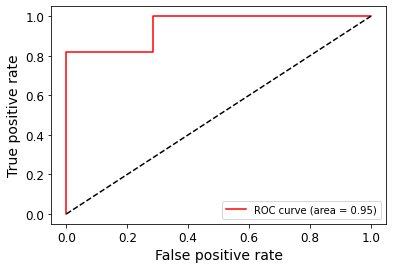

In [21]:
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show